In [1]:
#Imports
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
#Set CSV file locations.  May need modification if data moved to other folder.
aqi_csvlocation = '../Datasets/aqi.csv'
asthma_csvlocation = '../Datasets/asthmaER.csv'
population_csvlocation = '../Datasets/PEP_2017_PEPANNRES_with_ann.csv'

#Read the CSV's into dataframes
aqidf = pd.read_csv(aqi_csvlocation)
asthmadf = pd.read_csv(asthma_csvlocation)
populationdf = pd.read_csv(population_csvlocation)

#Pull out only the aqi data about Georgia
gaaqidf = aqidf.loc[aqidf['State']=='Georgia']

#Set indices as counties for convenience
popdf = populationdf.set_index('GEO.display-label')
asthmadf = asthmadf.set_index('County')

#Pull out a list of the counties that we are actually pursuing
countylist = gaaqidf['County'].unique()

In [3]:
asthmadf.head()

,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,
Appling,58,59,74,78,68,53,71,61
Atkinson,37,16,45,42,60,32,29,28
Bacon,53,40,65,51,50,45,34,40
Baker,22,13,13,26,25,33,26,24
Baldwin,255,264,406,321,300,259,323,251


In [4]:
#Remove commas and convert values to floats
#Otherwise we have Chatham County with values like 1,845

for year in np.arange(2010,2018):
    asthmadf[f'{year}'] = asthmadf[f'{year}'].str.replace(",","").astype(float)
asthmadf.loc['Chatham']

2010    1865.0
2011    1913.0
2012    2218.0
2013    2099.0
2014    1844.0
2015    1681.0
2016    1788.0
2017    1829.0
Name: Chatham, dtype: float64

In [5]:
#Saving as tempdf in order to keep from corrupting original dataframe
tempdf = asthmadf

In [6]:
#Adding new columns containing the prevalence per county per year

for year in np.arange(2010,2018):
    tempdf[f'{year} pcnt'] = [asthmadf.loc[county][f'{year}']/float(popdf.loc[f'{county} County, Georgia'][f'respop7{year}']) for county in asthmadf.index]

In [7]:
tempdf.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2010 pcnt,2011 pcnt,2012 pcnt,2013 pcnt,2014 pcnt,2015 pcnt,2016 pcnt,2017 pcnt
County,,,,,,,,,,,,,,,,
Appling,58.0,59.0,74.0,78.0,68.0,53.0,71.0,61.0,0.003163,0.003195,0.004021,0.004240,0.003675,0.002873,0.003841,0.003294
Atkinson,37.0,16.0,45.0,42.0,60.0,32.0,29.0,28.0,0.004423,0.001911,0.005439,0.005069,0.007279,0.003821,0.003486,0.003357
Bacon,53.0,40.0,65.0,51.0,50.0,45.0,34.0,40.0,0.004790,0.003584,0.005816,0.004552,0.004457,0.003987,0.002992,0.003534
Baker,22.0,13.0,13.0,26.0,25.0,33.0,26.0,24.0,0.006405,0.003920,0.003850,0.007759,0.007587,0.010309,0.008105,0.007500
Baldwin,255.0,264.0,406.0,321.0,300.0,259.0,323.0,251.0,0.005581,0.005848,0.008731,0.006953,0.006543,0.005690,0.007148,0.005589


In [8]:
gaaqidf.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
185,Georgia,Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
186,Georgia,Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0
187,Georgia,Chatham,2017,365,289,76,0,0,0,0,84,57,38,0,0,100,35,230,0
188,Georgia,Chattooga,2017,240,232,8,0,0,0,0,64,45,36,0,0,240,0,0,0
189,Georgia,Clarke,2017,360,314,46,0,0,0,0,97,53,38,0,0,188,0,172,0


In [9]:
gaaqidf = gaaqidf.drop(columns='State')
gaaqidf = gaaqidf.set_index('County')

In [10]:
gaaqidf.dtypes

Year                                   int64
Days with AQI                          int64
Good Days                              int64
Moderate Days                          int64
Unhealthy for Sensitive Groups Days    int64
Unhealthy Days                         int64
Very Unhealthy Days                    int64
Hazardous Days                         int64
Max AQI                                int64
90th Percentile AQI                    int64
Median AQI                             int64
Days CO                                int64
Days NO2                               int64
Days Ozone                             int64
Days SO2                               int64
Days PM2.5                             int64
Days PM10                              int64
dtype: object

In [11]:
#Next step: Keep days{year}, gooddays{year}, max{year}, median{year}, 90pcnt{year}

splitaqidf = pd.DataFrame(index=countylist)

for year in np.arange(2010,2018):
    splitaqidf[f'Total Days ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Days with AQI']
    splitaqidf[f'Good Days ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Good Days']
    splitaqidf[f'Max AQI ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Max AQI']
    splitaqidf[f'90th Percentile AQI ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['90th Percentile AQI']
    splitaqidf[f'Median AQI ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Median AQI']
    splitaqidf[f'Days PM2.5 ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Days PM2.5']
    splitaqidf[f'Days PM10 ({year})'] = gaaqidf.loc[gaaqidf['Year']==year]['Days PM10']
    
    
splitaqidf.head()



,Total Days (2010),Good Days (2010),Max AQI (2010),90th Percentile AQI (2010),Median AQI (2010),Days PM2.5 (2010),Days PM10 (2010),Total Days (2011),Good Days (2011),Max AQI (2011),...,Median AQI (2016),Days PM2.5 (2016),Days PM10 (2016),Total Days (2017),Good Days (2017),Max AQI (2017),90th Percentile AQI (2017),Median AQI (2017),Days PM2.5 (2017),Days PM10 (2017)
Bibb,364.0,160.0,133.0,76.0,53.0,289.0,1.0,364,174,151,...,42,219,0,365.0,284.0,93.0,58.0,40.0,202.0,0.0
Charlton,119.0,107.0,67.0,51.0,30.0,119.0,0.0,115,93,89,...,23,117,0,47.0,43.0,89.0,47.0,25.0,47.0,0.0
Chatham,365.0,183.0,107.0,74.0,50.0,178.0,0.0,365,176,160,...,39,191,0,365.0,289.0,84.0,57.0,38.0,230.0,0.0
Chattooga,264.0,203.0,97.0,71.0,41.0,0.0,22.0,256,202,115,...,42,0,0,240.0,232.0,64.0,45.0,36.0,0.0,0.0
Clarke,365.0,205.0,147.0,77.0,46.0,228.0,0.0,365,212,126,...,40,171,0,360.0,314.0,97.0,53.0,38.0,172.0,0.0


In [12]:
mergeddf = pd.merge(splitaqidf,tempdf,left_index=True,right_index=True)
mergeddf.head()

,Total Days (2010),Good Days (2010),Max AQI (2010),90th Percentile AQI (2010),Median AQI (2010),Days PM2.5 (2010),Days PM10 (2010),Total Days (2011),Good Days (2011),Max AQI (2011),...,2016,2017,2010 pcnt,2011 pcnt,2012 pcnt,2013 pcnt,2014 pcnt,2015 pcnt,2016 pcnt,2017 pcnt
Bibb,364.0,160.0,133.0,76.0,53.0,289.0,1.0,364,174,151,...,1324.0,1416.0,0.006187,0.005806,0.006492,0.006345,0.006599,0.006673,0.008642,0.009263
Charlton,119.0,107.0,67.0,51.0,30.0,119.0,0.0,115,93,89,...,19.0,18.0,0.003968,0.003343,0.002919,0.002896,0.002071,0.001744,0.001490,0.001416
Chatham,365.0,183.0,107.0,74.0,50.0,178.0,0.0,365,176,160,...,1788.0,1829.0,0.007015,0.007036,0.008022,0.007551,0.006519,0.005861,0.006179,0.006296
Chattooga,264.0,203.0,97.0,71.0,41.0,0.0,22.0,256,202,115,...,79.0,57.0,0.002736,0.002298,0.003747,0.003274,0.004023,0.002571,0.003181,0.002301
Clarke,365.0,205.0,147.0,77.0,46.0,228.0,0.0,365,212,126,...,610.0,591.0,0.003490,0.003749,0.004254,0.004649,0.004548,0.004480,0.004879,0.004651


In [13]:
mergeddf = mergeddf.drop(columns=['2010','2011','2012','2013','2014','2015','2016','2017'])

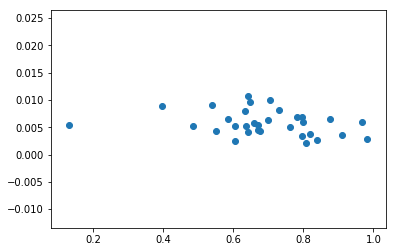

In [14]:
plt.scatter(mergeddf['Good Days (2012)']/mergeddf['Total Days (2012)'],mergeddf['2012 pcnt'])

In [15]:
stats.linregress(mergeddf['Good Days (2012)']/mergeddf['Total Days (2012)'],mergeddf['2012 pcnt'])

LinregressResult(slope=-0.003618305568060568, intercept=0.008280472912821264, rvalue=-0.2679052159177189, pvalue=0.1382184190171922, stderr=0.002375693965933747)

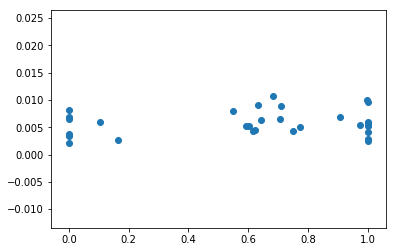

In [16]:
plt.scatter(mergeddf['Days PM2.5 (2012)']/mergeddf['Total Days (2012)'],mergeddf['2012 pcnt'])

In [17]:
stats.linregress(mergeddf['Days PM2.5 (2012)']/mergeddf['Total Days (2012)'],mergeddf['2012 pcnt'])

LinregressResult(slope=0.0011305358721534718, intercept=0.005116563853583084, rvalue=0.1946638865381632, pvalue=0.28568810370648245, stderr=0.0010400393827557854)

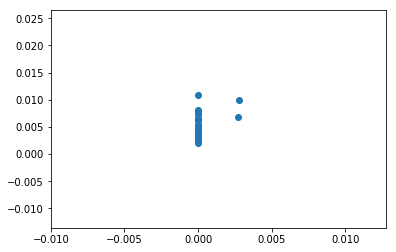

In [18]:
plt.scatter(mergeddf['Days PM10 (2013)']/mergeddf['Total Days (2013)'],mergeddf['2013 pcnt'])